In [ ]:
install.packages(c("factoextra", "cluster", "dendextend", "ggplot2", "data.table", "tidyverse"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘pbkrtest’, ‘lme4’, ‘car’, ‘rstatix’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’, ‘viridis’




In [ ]:
library(factoextra)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [ ]:
packages <- c("dplyr", "cluster", "factoextra", "NbClust", "plotly", "reticulate", "scatterplot3d", "Rtsne")
new_packages <- packages[!(packages %in% installed.packages()[,"Package"])]
if(length(new_packages)) install.packages(new_packages)

library(dplyr)
library(cluster)
library(factoextra)
library(NbClust)
library(plotly)
library(reticulate)
library(scatterplot3d)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppTOML’, ‘here’, ‘png’



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




In [ ]:
df <- read.csv("credit_card.csv")
df <- na.omit(df)
df_scaled <- scale(df[, sapply(df, is.numeric)])

In [ ]:
pca <- prcomp(df_scaled, center = TRUE, scale. = TRUE)
pca_df <- as.data.frame(pca$x[, 1:3])

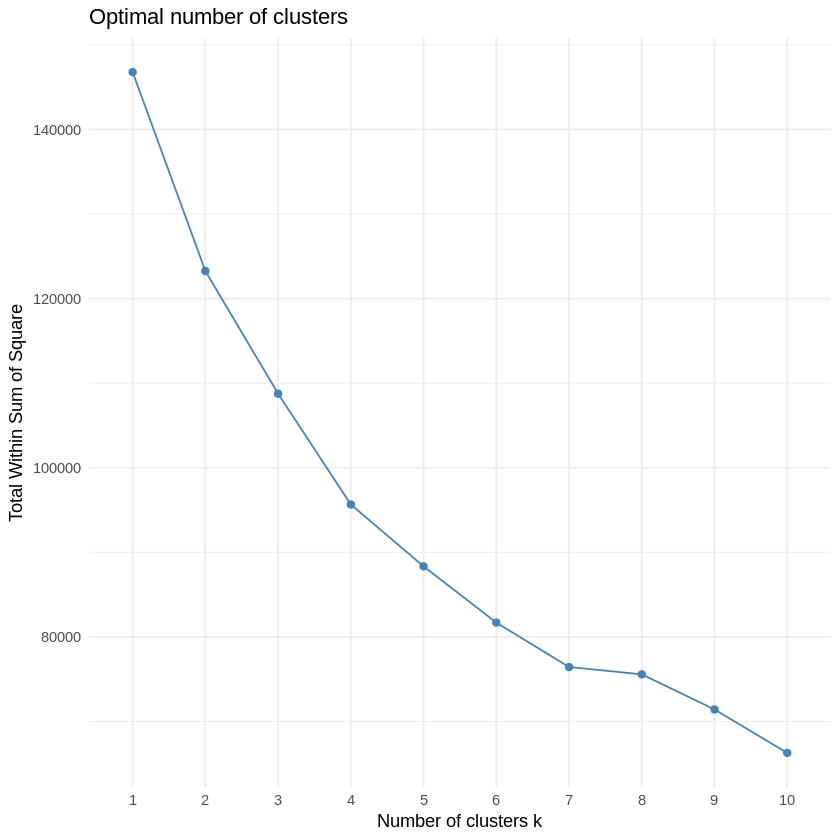

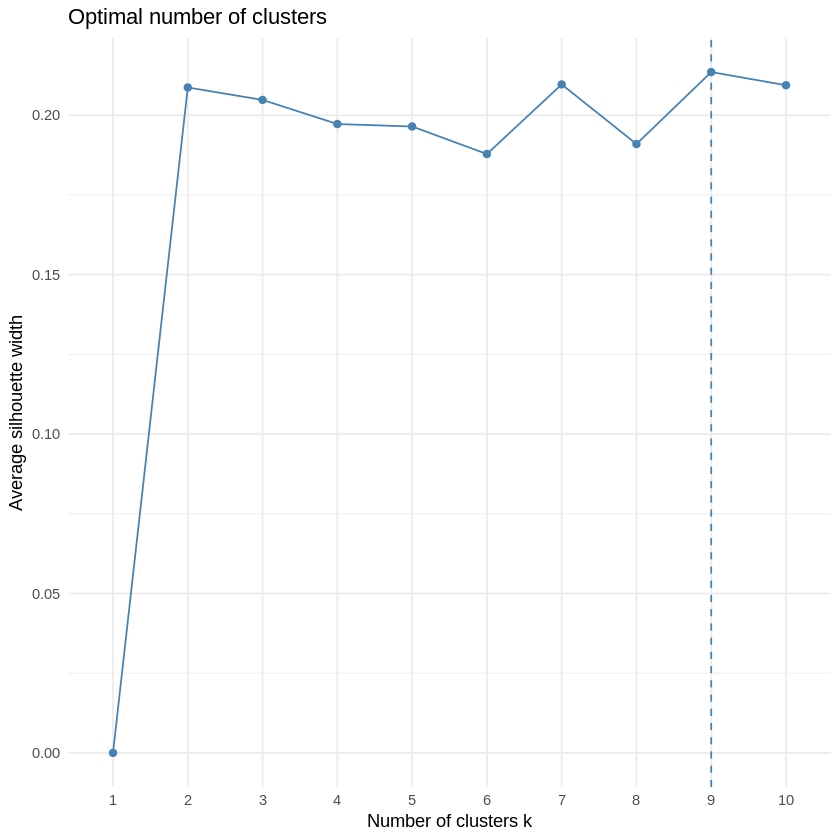

In [ ]:
fviz_nbclust(df_scaled, kmeans, method = "wss") + theme_minimal()
fviz_nbclust(df_scaled, kmeans, method = "silhouette") + theme_minimal()

In [ ]:
# Install reticulate and use system Python (Colab has it pre-installed)
install.packages("reticulate")
library(reticulate)

# Tell reticulate to use the system's Python
use_python("/usr/bin/python3", required = TRUE)

system("pip install scikit-learn")

py_config()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



python:         /usr/bin/python3
libpython:      /usr/lib/python3.11/config-3.11-x86_64-linux-gnu/libpython3.11.so
pythonhome:     //usr://usr
version:        3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]
numpy:          /usr/local/lib/python3.11/dist-packages/numpy
numpy_version:  2.0.2
sklearn:        /usr/local/lib/python3.11/dist-packages/sklearn

NOTE: Python version was forced by use_python() function

In [ ]:
sk <- import("sklearn.cluster")
birch <- sk$Birch(n_clusters = as.integer(4))
clusters <- birch$fit_predict(df_scaled)
df$birch <- as.integer(clusters)

In [ ]:
hc <- hclust(dist(df_scaled), method = "ward.D2")
agglo_clusters <- cutree(hc, k = 4)
df$agglo <- as.factor(agglo_clusters)

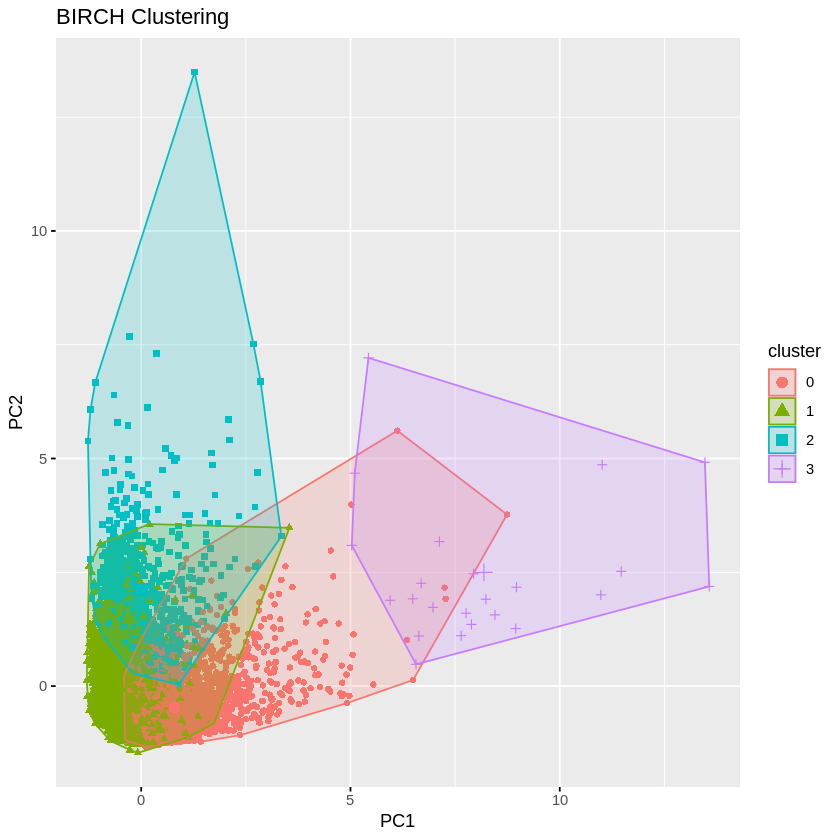

In [ ]:
fviz_cluster(list(data = pca_df[,1:2], cluster = df$birch), geom = "point", ellipse.type = "convex", main = "BIRCH Clustering")

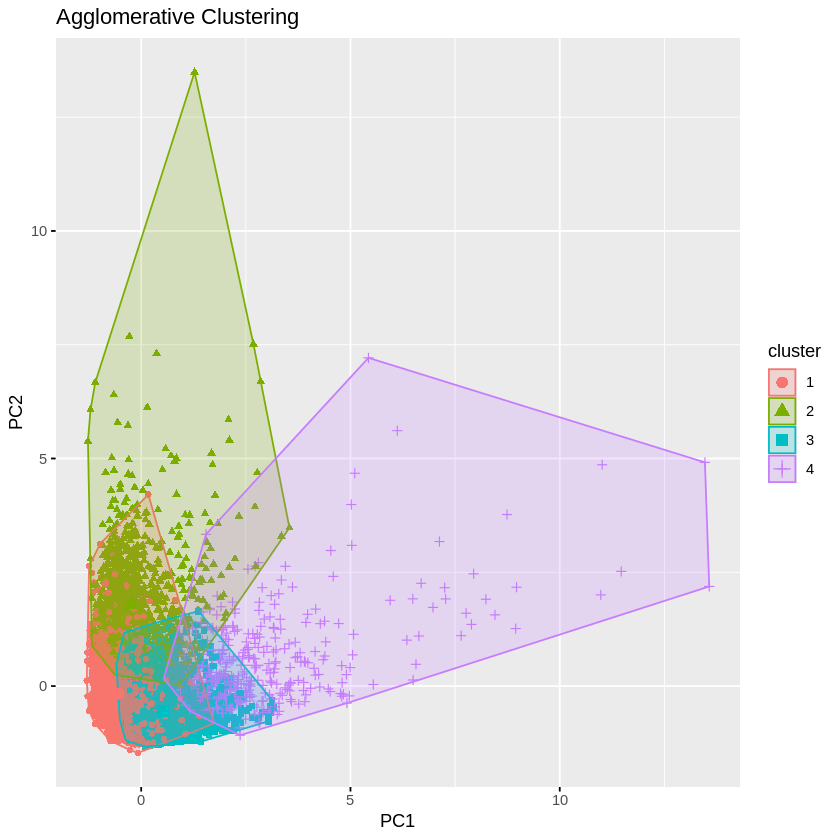

In [ ]:
fviz_cluster(list(data = pca_df[,1:2], cluster = df$agglo), geom = "point", ellipse.type = "convex", main = "Agglomerative Clustering")

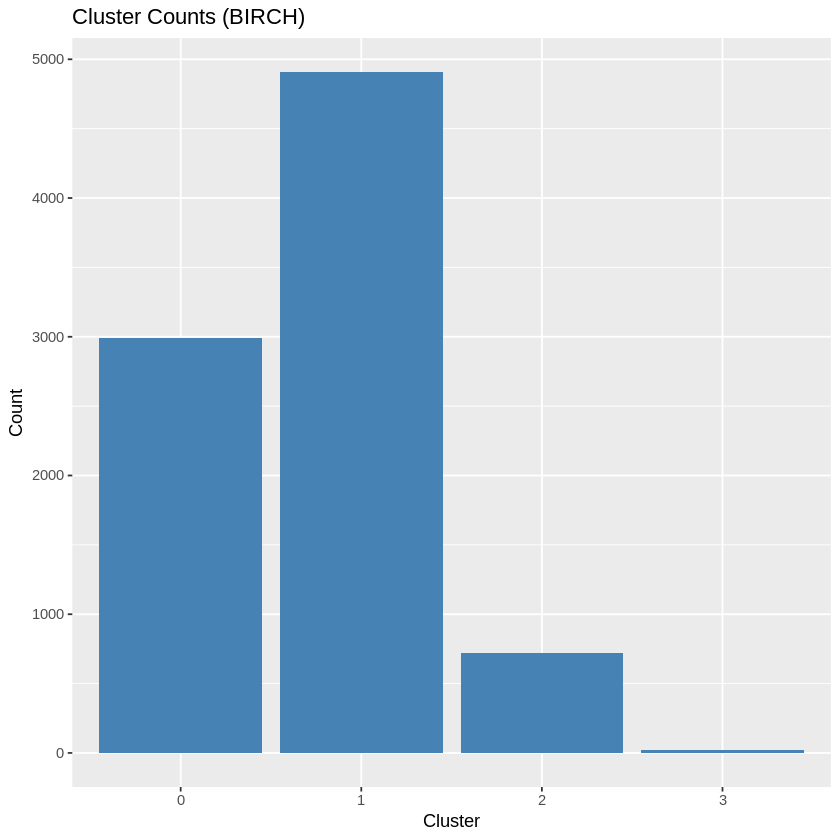

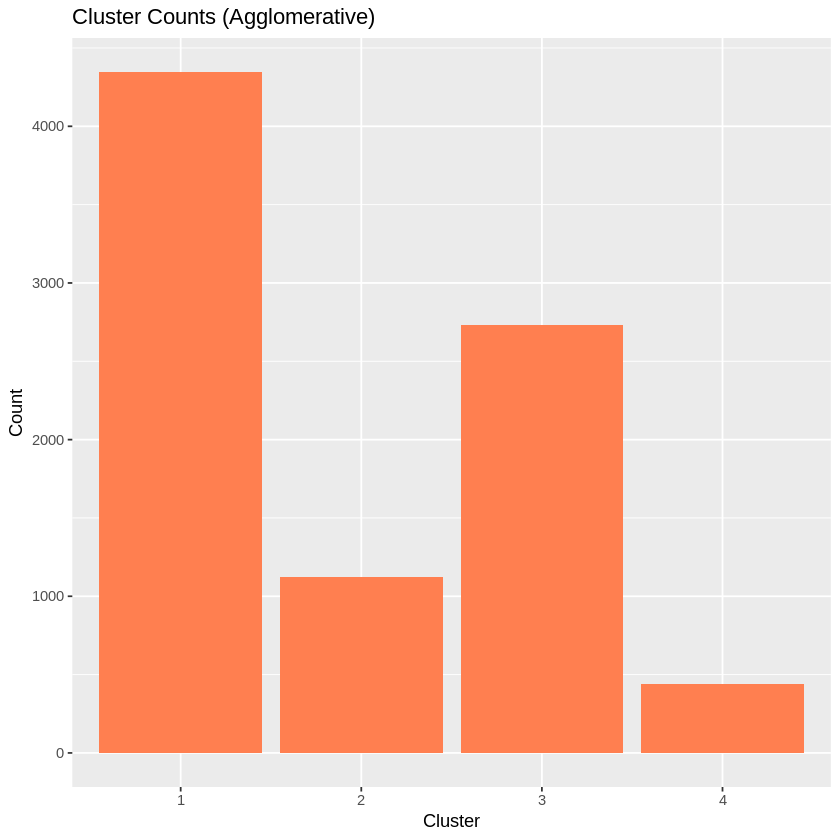

In [ ]:
ggplot(df, aes(x = factor(birch))) +
  geom_bar(fill = "steelblue") +
  labs(title = "Cluster Counts (BIRCH)", x = "Cluster", y = "Count")

ggplot(df, aes(x = factor(agglo))) +
  geom_bar(fill = "coraL") +
  labs(title = "Cluster Counts (Agglomerative)", x = "Cluster", y = "Count")

In [ ]:
sil_birch <- silhouette(as.integer(df$birch), dist(df_scaled))
sil_agglo <- silhouette(as.integer(df$agglo), dist(df_scaled))

cat("BIRCH Silhouette Score:", mean(sil_birch[, 3]), "\n")
cat("Agglomerative Silhouette Score:", mean(sil_agglo[, 3]), "\n")

BIRCH Silhouette Score: 0.1920763 
Agglomerative Silhouette Score: 0.1626117 
